YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


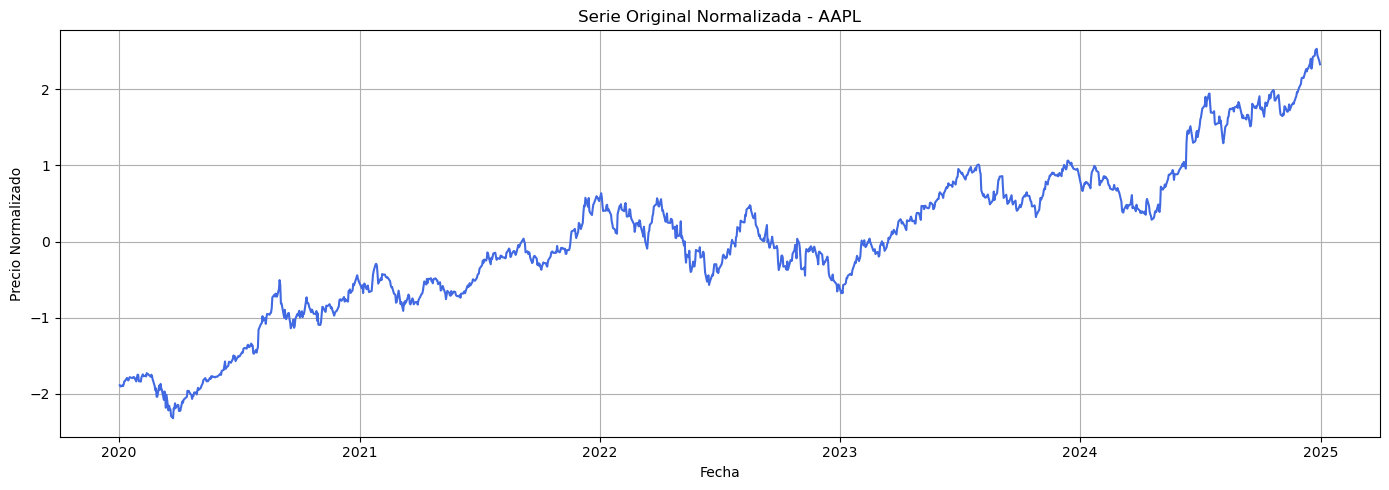

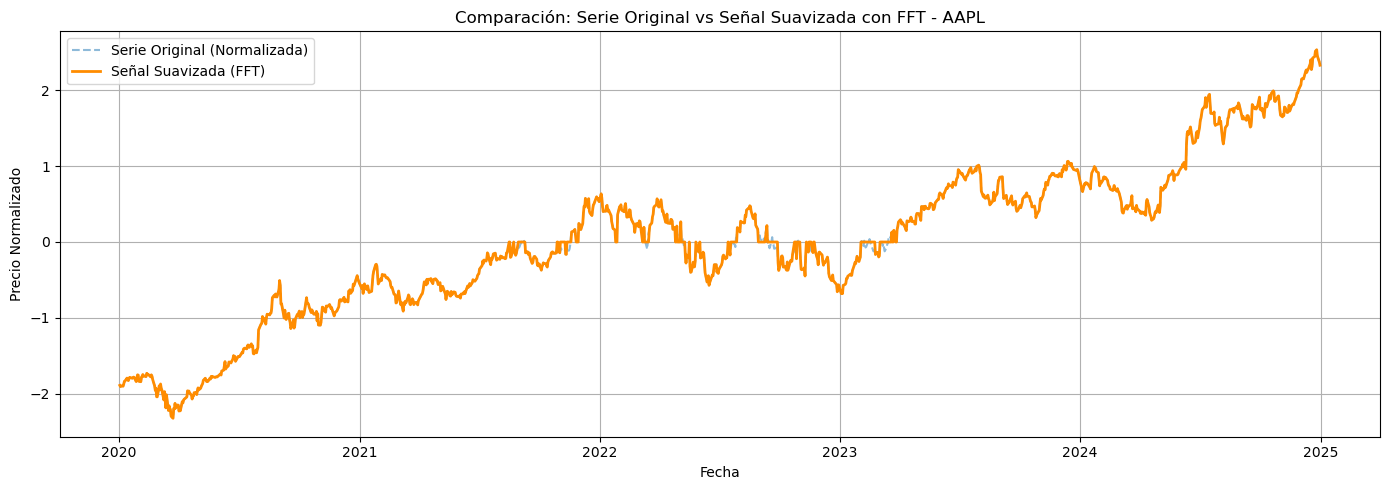

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft


df = yf.download('AAPL', start='2020-01-01', end='2025-01-01')
prices = df['Close']


prices = prices.interpolate() 
normalized_prices = (prices - prices.mean()) / prices.std()  


N = len(normalized_prices)
frequencies = fft(normalized_prices)


threshold = 0.05 * np.max(np.abs(frequencies)) 
filtered_frequencies = frequencies.copy()
filtered_frequencies[np.abs(filtered_frequencies) < threshold] = 0


reconstructed_signal = np.real(ifft(filtered_frequencies))



plt.figure(figsize=(14, 5))
plt.plot(prices.index, normalized_prices, color='royalblue')
plt.title('Serie Original Normalizada - AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio Normalizado')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(prices.index, normalized_prices, label='Serie Original (Normalizada)', alpha=0.5, linestyle='--')
plt.plot(prices.index, reconstructed_signal, label='Señal Suavizada (FFT)', color='darkorange', linewidth=2)
plt.title('Comparación: Serie Original vs Señal Suavizada con FFT - AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio Normalizado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()